In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

In [2]:
df1=pd.read_csv("C:\\Users\\Sampath\\Downloads\\Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
def sized(x):
    x=int(x.split(' ')[0])
    return x
    #print(type(x))
sized("23 bedroom")
df2=df1.copy()
df2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df2=df2.drop(['area_type','availability','society','balcony'],axis='columns')

In [6]:
df2.isnull().sum()
#df2.head()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df2=df2.dropna()#drop all the null values as part of datacleaning as the no. of null fields are less 
df2.shape

(13246, 5)

In [8]:
df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))
df2.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [9]:
def is_float(x):
    try:
        x=float(x)
    except:
        return False
    return True
is_float("3k")

False

In [10]:
df2[~df2['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [11]:
def avg_sqft(x):#function for calculating avg of range given in some total_sqft of houses
    if(is_float(x)):
        return float(x);
    else:
        temp=x.split('-')
        if(len(temp)==2):
            return (float(temp[0])+float(temp[1]))/2
        else:
            return None
avg_sqft("7409- 9011")

8210.0

In [12]:
#have a mean value of range for sqft where range is given as part of datacleaning
df2['total_sqft']=df2['total_sqft'].apply(avg_sqft)
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [13]:
print(df2['total_sqft'].count())
df2.shape

13200


(13246, 6)

In [14]:
df2.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [15]:
df2=df2.dropna()#drop null values after removing some of total_sqft values
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [16]:
df2['price_per_sqft']=df2['price']*100000/df2['total_sqft']
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [17]:
df2['price_per_sqft'].describe()
df2['location'].unique()
len(df2['location'].unique())

1298

In [18]:
df2['location']=df2['location'].apply(lambda x: x.strip())
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
location_stats=df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.tail(1200)
#output shows many location areas have less no. of data points(houses) so put all the locations with less than 10 houses under
#"others" section as it would reduce a large no. of columns when onehotencoded

location
Frazer Town             35
Bommanahalli            34
Hebbal Kempapura        34
Tumkur Road             33
Kalena Agrahara         33
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1200, dtype: int64

In [20]:
#considering to put all the locations whose frequency is below 10 in others section, so as to reduce no. of columns in
#onehot encoding
location_stats_lt_10=location_stats[location_stats<=10]
location_stats_lt_10

location
Dodsworth Layout        10
BTM 1st Stage           10
Sadashiva Nagar         10
Thyagaraja Nagar        10
Kalkere                 10
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1047, dtype: int64

In [21]:
#considering to put all the locations whose frequency is below 10 in others section, so as to reduce no. of columns in
#onehot encoding
df2['location']=df2['location'].apply(lambda x: "others" if x in location_stats_lt_10 else x)
df2.head(20)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,others,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [22]:
len(df2['location'].unique())
#now just 241 different locations=> just 241 columns instead of some 2000+ columns for this categorical variable

241

In [23]:
len(df2['location'][df2['location']=='others'])

2872

In [24]:
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
df10=df2.copy()
df10.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
dummies=pd.get_dummies(df2['location'])
dummies=dummies.drop(['others'],axis='columns')
df10=pd.concat([df10,dummies],axis='columns')
df10=df10.drop(['location','size','price_per_sqft'],axis='columns')
X=df10.drop('price',axis='columns')
Y=df10['price']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
linear_regressor=LinearRegression()
linear_regressor.fit(X_train,y_train)
print("The score of machine learning model before any feature engineering:",linear_regressor.score(X_test,y_test))

The score of machine learning model before any feature engineering: 0.45587036118023394


We can clearly see that the score of machine learning model is too low and the prediction could be far from reality
So, we need to do some feature engineering and remove all the outliers,illogical datapoints,the data points which lead our model in wrong direction. This process is called as feature engineering(this process is mostly handled by datascientists)

In [27]:
#all the houses which have sqft per bhk < 300 are considered to be illogical or 
#unconventional values according to business logic,so remove those houses from the dataset
df2[(df2['total_sqft']/df2['bhk']<300)].shape

(744, 7)

In [28]:
#removing houses which have sqft per bhk < 300(outliers in business sense)
df2=df2[~(df2['total_sqft']/df2['bhk']<300)]
df2.shape

(12456, 7)

In [29]:
df2['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [30]:
len(df2[df2['price_per_sqft']<2200])
len(df2[df2['price_per_sqft']>10000])

1222

In [31]:
#function for removing outliers i.e.houses with price_per_sqft not in range of (mean +- stdeviation)
#and this should be done for every location specifically because from our feature engineering we know that
#location has most impact on house price i.e. diff locations have diff mean house price
def remove_pps_outliers(df):
    final_df=pd.DataFrame()
    for key,sub_df in df.groupby('location'):
        mean=np.mean(sub_df['price_per_sqft'])
        std=np.std(sub_df['price_per_sqft'])
        reduced_df=sub_df[(sub_df.price_per_sqft>(mean-std)) & (sub_df.price_per_sqft<=(mean+std))]
        final_df=pd.concat([final_df,reduced_df],ignore_index=True)
    return final_df
df3=remove_pps_outliers(df2)
df3.head()
df3.shape
#according to output nearly 2200 houses are reduced as outliers as they are out of specified range

(10242, 7)

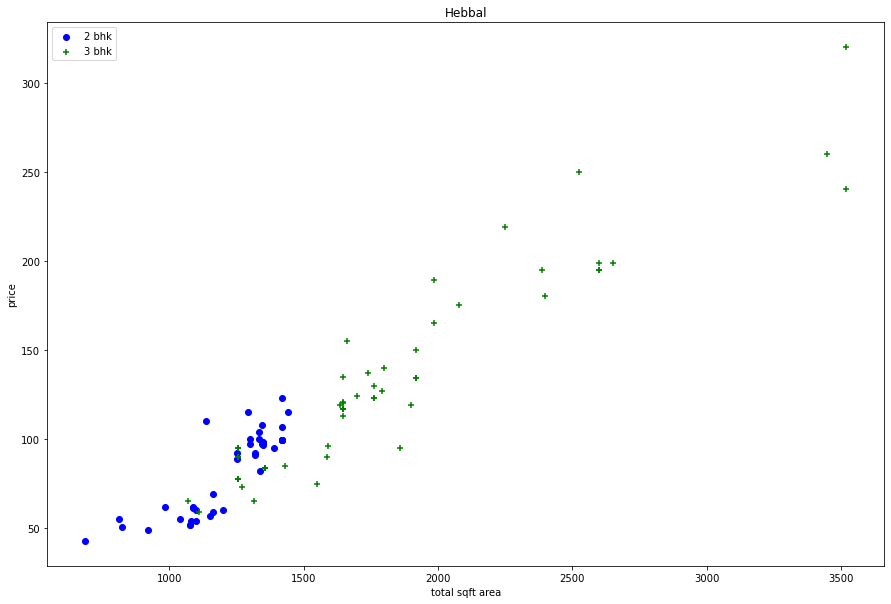

In [32]:
def plot_to_see_outliers(df,location):
    bhk2=df[(df['location']==location) & (df['bhk']==2)]
    bhk3=df[(df['location']==location) & (df['bhk']==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk')
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3 bhk',marker='+')
    plt.xlabel("total sqft area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()
plot_to_see_outliers(df3,"Hebbal")
#temp=df3['location'].unique()
#for location in temp[:5]:
#    plot_to_see_outliers(df3,location)

In [33]:
#drop those houses where for a specific location if "n bhk" flat has less price than "n-1 bhk" flat with same total sqft
#for instance, in above plot, for area Hebbal houses at 1300-1350 sqft have some 3 bhk flats less price than 2 bhk flats
def remove_ssftdbp_outliers(df):#remove same sqft diff bhk price outliers
    exclude_indices=np.array([])
    for location,locdf in df.groupby('location'):
        bhk_stats={}
        for bhk,bhkdf in locdf.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhkdf['price_per_sqft']),
                'std':np.std(bhkdf['price_per_sqft']),
                'count':bhkdf.shape[0]
            }
        for bhk,bhkdf in locdf.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if(stats and stats['count']>5):
                exclude_indices=np.append(exclude_indices,bhkdf[ bhkdf.price_per_sqft < (stats['mean']) ].index.values)
    return df.drop(exclude_indices,axis='index')
df4=remove_ssftdbp_outliers(df3)
df4.shape

(7317, 7)

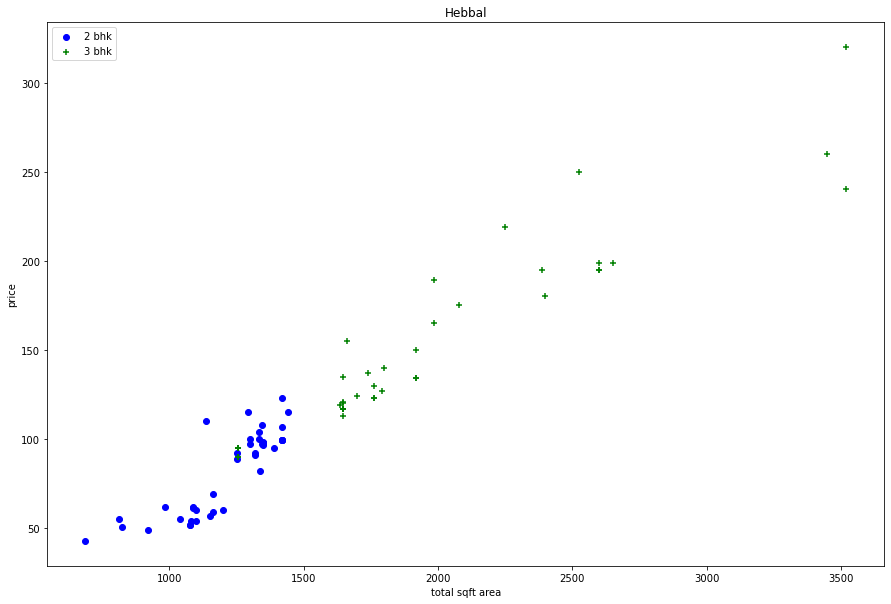

In [34]:
plot_to_see_outliers(df4,"Hebbal")
#from plot below we can clearly tell that "same sqft diff bhk price outliers" are removed successfully

In [35]:
#another outlier related to business logic is no. of bathrooms cant be more than bhk+2
df4=df4[df4['bath']<=df4['bhk']+2]
df4.shape

(7313, 7)

Text(0, 0.5, 'no. of houses')

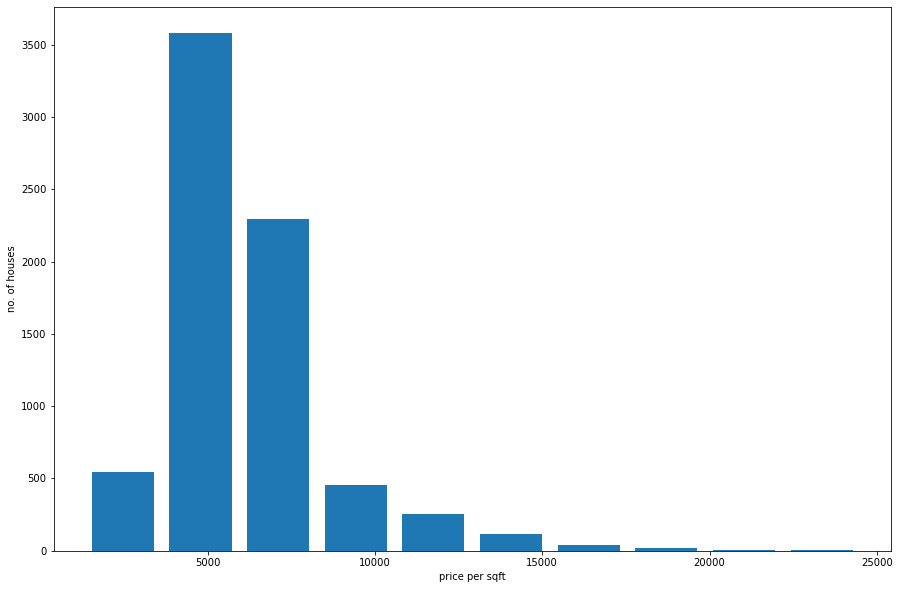

In [36]:
#now we shall plot a histogram to see pricepersqft distribution over houses
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("price per sqft")
plt.ylabel("no. of houses")
#data shown in histogram says our dataset almost has normal distribution of price_per-sqft
#with most of houses(data points) lying in range of(0-15000)

In [37]:
#now we shall unnecessary columns from our dataframe i.e. size(as we replaced this with bhk)
#,price_per_sqft(as this is created just for oulier removal)
df5=df4.drop(['size','price_per_sqft'],axis='columns')
df5.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [38]:
dummies=pd.get_dummies(df5['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
dummies=dummies.drop(['others'],axis='columns')
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df6=pd.concat([df5,dummies],axis='columns')
df6.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df6=df6.drop('location',axis='columns')
df6.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df6.shape

(7313, 244)

In [43]:
X=df6.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
Y=df6['price']
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [46]:
y_test

4877     61.00
3008     52.32
2601     53.00
5756    369.00
94       94.00
         ...  
1045     52.17
3486    145.00
7327    175.00
5514     48.00
7151     67.48
Name: price, Length: 1463, dtype: float64

In [47]:
from sklearn.linear_model import LinearRegression
linear_regressor=LinearRegression()
linear_regressor.fit(X_train,y_train)
linear_regressor.score(X_test,y_test)

0.8100855727728585

In [48]:
linear_regressor.score(X_train,y_train)

0.8613919583776417

In [49]:
def predict_price(location,total_sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=total_sqft
    x[1]=bath
    x[2]=bhk
    if(loc_index>0):
        x[loc_index]=1
    return linear_regressor.predict([x])
predict_price('Ambedkar Nagar',1000,2,3)

array([48.60207394])

In [50]:
from sklearn.linear_model import Lasso
model_lasso=Lasso(alpha=50,max_iter=100,tol=0.1)
model_lasso.fit(X_train,y_train)
print("The score of lasso model for the testing dataset:",model_lasso.score(X_test,y_test))
print("The score of lasso model for the training dataset:",model_lasso.score(X_train,y_train))

The score of lasso model for the testing dataset: 0.6495906273961068
The score of lasso model for the training dataset: 0.7134258577398189


In [51]:
from sklearn.linear_model import Ridge
model_ridge=Ridge(alpha=50,max_iter=100,tol=0.1)
model_ridge.fit(X_train,y_train)
print("The score of ridge model for the testing dataset:",model_ridge.score(X_test,y_test))
print("The score of ridge model for the training dataset:",model_ridge.score(X_train,y_train))
ridge_regression=Ridge(alpha=0.1,max_iter=25,tol=0.05)
ridge_regression.fit(X_train,y_train)
print("The score of ridge model for the testing dataset with best parameters:",ridge_regression.score(X_test,y_test))

The score of ridge model for the testing dataset: 0.7196185435015507
The score of ridge model for the training dataset: 0.7710275368184468
The score of ridge model for the testing dataset with best parameters: 0.8103742537418515


KFOLD CROSS VALIDATION

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [53]:
ss=ShuffleSplit(n_splits=5,test_size=0.2)
result=cross_val_score(linear_regressor,X,Y,cv=ss)
print("The score of linear_regressor for the kfold cross validation scoring:",np.average(result))
result=cross_val_score(model_lasso,X,Y,cv=ss)
print("The score of LASSO regression for the kfold cross validation scoring:",np.average(result))
result=cross_val_score(model_ridge,X,Y,cv=ss)
print("The score of RIDGE regression for the kfold cross validation scoring:",np.average(result))

The score of linear_regressor for the kfold cross validation scoring: 0.8186673939685527
The score of LASSO regression for the kfold cross validation scoring: 0.7176341070378446
The score of RIDGE regression for the kfold cross validation scoring: 0.7373821257942073


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
def finding_best_model_using_GridSearchCV(X,Y):#function for finding best model amoomng all for this home price prediction
    regressors={
        'linearregression':{
            'model':LinearRegression(),
            'parameters':{
                'normalize':[True,False]
            }
        },
        'DecisionTreeRegressor':{
            'model':DecisionTreeRegressor(),
            'parameters':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'GradientBoosting':{
            'model':GradientBoostingRegressor(),
            'parameters':{
                'n_estimators':[130],
                'learning_rate':[0.361,0.362,0.363,0.364]
            }
        },
        'lassoregression':{
            'model':Lasso(),
            'parameters':{
                'alpha':[0.1,0.15,0.2],
                'selection':['random','cyclic'],
                'max_iter':[25,40,50,75],
                'tol':[0.05,0.1,0.15]
            }
        },
        
        'Ridgeregression':{
            'model':Ridge(),
            'parameters':{
                'alpha':[0.1,0.15,0.2],
                'max_iter':[25,40,50,75],
                'tol':[0.05,0.1,0.15]
            }
        }
        
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    i=0
    for model,model_details in regressors.items():
        gs=GridSearchCV(model_details['model'],model_details['parameters'],cv=cv,return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model':model,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        #print(scores[i]['best_score'],gs.best_score_)
        i+=1
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
finding_best_model_using_GridSearchCV(X,Y)

C:\Users\Sampath\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5724629.907834787, tolerance: 2585409.0700254925
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sampath\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5847639.302556015, tolerance: 2679189.8666845835
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sampath\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5852683.150898581, tolerance: 2580965.581917248
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sampath\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Converg

,model,best_score,best_params
0,linearregression,0.849768,{'normalize': False}
1,DecisionTreeRegressor,0.741078,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,GradientBoosting,0.825392,"{'learning_rate': 0.364, 'n_estimators': 130}"
3,lassoregression,0.802835,"{'alpha': 0.1, 'max_iter': 50, 'selection': 'r..."
4,Ridgeregression,0.849818,"{'alpha': 0.1, 'max_iter': 25, 'tol': 0.05}"


In [55]:
from sklearn.metrics import r2_score
def hybrid_score(model1,model2,X,Y,x_percentage):
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
    model1.fit(X_train,y_train)
    model2.fit(X_train,y_train)

    result1=model1.predict(X_test)
    #print(result1)
    result2=model2.predict(X_test)
    #print(result2)
    resulth=(result1*x_percentage+result2*(1-x_percentage))
    #print(resulth)
    std=(resulth-y_test)/y_test# percentage of deviation from  actual value
    #print(y_test)
    #print(std)
    r2=r2_score(y_test, resulth)
    #print("length:",len(resulth))
    mae=np.sum(abs(std))/len(resulth)
    mse=np.sum(std**2)/len(resulth)
    return mae,mse,r2
linear_regression=LinearRegression(normalize=False)
ridge_regression=Ridge(alpha=0.1,max_iter=25,tol=0.05)
lasso_regression=Lasso(alpha=0.1,max_iter=75,tol=0.05)


mae,mse,r2=hybrid_score(linear_regression,ridge_regression,X,Y,0)
print("Mean-absolute eror:",mae,"\nMean-squared eror :",mse,"\nr2 score          :",r2)
print("\n\n")

mae,mse,r2=hybrid_score(linear_regression,ridge_regression,X,Y,0.9)
print("Mean-absolute eror:",mae,"\nMean-squared eror :",mse,"\nr2 score          :",r2)
print("\n\n")

mae,mse,r2=hybrid_score(lasso_regression,ridge_regression,X,Y,0.05)
print("Mean-absolute eror:",mae,"\nMean-squared eror :",mse,"\nr2 score          :",r2)
print("\n\n")

mae,mse,r2=hybrid_score(lasso_regression,linear_regression,X,Y,0.05)
print("Mean-absolute eror:",mae,"\nMean-squared eror :",mse,"\nr2 score          :",r2)

Mean-absolute eror: 0.202376055627235 
Mean-squared eror : 0.10150386404826865 
r2 score          : 0.8103742537418515



Mean-absolute eror: 0.20322661894391478 
Mean-squared eror : 0.10274315702363455 
r2 score          : 0.8101174023741022



Mean-absolute eror: 0.20005320373954827 
Mean-squared eror : 0.09821656909973198 
r2 score          : 0.8101629432315882



Mean-absolute eror: 0.20081909360529968 
Mean-squared eror : 0.09937597184256326 
r2 score          : 0.8099857039171406


In [56]:
from sklearn.metrics import r2_score
def kfoldcrossvalidationscore(model1,model2,X,Y):
    
    ss=ShuffleSplit(n_splits=5,test_size=0.2)
    resultm1=cross_val_score(model1,X,Y,cv=ss)
    print("The score of model1 for the kfold cross validation scoring:",resultm1,"\n",np.average(resultm1))
    resultm2=cross_val_score(model2,X,Y,cv=ss)
    print("The score of model2 regression for the kfold cross validation scoring:",resultm2,"\n",np.average(resultm2))
    
linear_regression=LinearRegression(normalize=False)
ridge_regression=Ridge(alpha=0.1,max_iter=25,tol=0.05)
lasso_regression=Lasso(alpha=0.1,max_iter=75,tol=0.05)
kfoldcrossvalidationscore(linear_regression,ridge_regression,X,Y)

The score of model1 for the kfold cross validation scoring: [0.82656088 0.8749434  0.83000008 0.79717626 0.84256635] 
 0.8342493953860197
The score of model2 regression for the kfold cross validation scoring: [0.86341526 0.77819337 0.83854967 0.84776005 0.85039141] 
 0.8356619515693549


Here linear,ridge regression won the race among all the ML models used for prediction.
But when ran most of the times ridge regression(0.810374253) gave a small value higher than linear regression(0.8100855727728585), so we decided in using ridge regression as our predictor model
Now we will just export the trained model into a file

In [58]:
ridge_regression.fit(X_train,y_train)
import pickle
with open("C:\\Users\\Sampath\\AI_miniproject\\models\\bangalore_home_prices_model.pickle",'wb') as f:
    pickle.dump(ridge_regression,f)

In [59]:
import joblib
joblib.dump(linear_regressor,'C:\\Users\\Sampath\\PycharmProjects\\AI_miniproject_trial\\artifacts\\bangalore_home_prices_model.joblib')
modelj = joblib.load('C:\\Users\\Sampath\\PycharmProjects\\AI_miniproject_trial\\artifacts\\bangalore_home_prices_model.joblib')

Export location and column information to a file that will be useful later on in our prediction application

In [60]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open("C:\\Users\\Sampath\\AI_miniproject\\models\\data_columns.json",'w') as f:
    f.write(json.dumps(columns))